In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [52]:
creditCustomers = pd.read_csv("data/project/ds.csv")
#creditCustomers

creditcustomers_small = creditCustomers.iloc[:,1:]
creditcustomers_small = creditcustomers_small.rename(columns={'FICO V2 Score':'F02_SCORE',  'FICO V3 Score':'F03_SCORE', 'FICO V08 Score':'F08_SCORE'})
creditcustomers_small = creditcustomers_small.loc[creditcustomers_small['F02_SCORE'] < 1000]
creditcustomers_small = creditcustomers_small.loc[creditcustomers_small['F03_SCORE'] < 1000]
creditcustomers_small = creditcustomers_small.loc[creditcustomers_small['F08_SCORE'] < 1000]
creditcustomers_small

,F02_SCORE,F03_SCORE,F08_SCORE,Status
0,633,641,692,APPROVED
1,739,731,756,APPROVED
2,781,796,829,APPROVED
3,639,610,676,APPROVED
4,702,668,676,APPROVED
5,542,486,514,APPROVED
6,685,665,641,APPROVED
7,774,741,755,APPROVED
8,810,827,796,APPROVED
9,689,691,718,APPROVED


In [54]:
creditcustomers_small.replace(to_replace={'Status':"APPROVED"}, value=1, inplace=True)
creditcustomers_small.replace(to_replace={'Status':"DECLINED"}, value=0, inplace=True)
creditcustomers_small

,F02_SCORE,F03_SCORE,F08_SCORE,Status
0,633,641,692,1
1,739,731,756,1
2,781,796,829,1
3,639,610,676,1
4,702,668,676,1
5,542,486,514,1
6,685,665,641,1
7,774,741,755,1
8,810,827,796,1
9,689,691,718,1


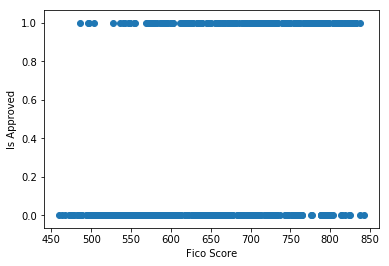

In [55]:
plt.xlabel("Fico Score")
plt.ylabel("Is Approved")
plt.scatter(creditcustomers_small['F02_SCORE'], creditcustomers_small['Status'])

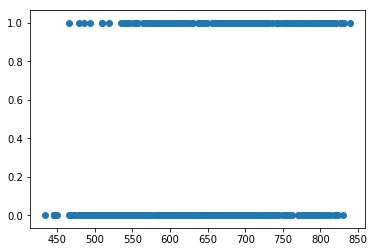

In [56]:
plt.scatter(creditcustomers_small['F03_SCORE'], creditcustomers_small['Status'])

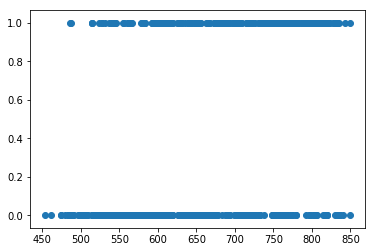

In [57]:
plt.scatter(creditcustomers_small['F08_SCORE'], creditcustomers_small['Status'])

In [82]:
from sklearn.model_selection import train_test_split
 

feature_vector = creditcustomers_small.iloc[:,0:3] # What is hte feature vector (gpa, gre, rank)
labels = creditcustomers_small['Status'] # What is the label (admit) 
    
train_x, test_x, train_y, test_y = train_test_split(feature_vector, 
                                                    labels, test_size=0.15)
print("training set = " , len(train_x))
print("testing set = " , len(test_x))

training set =  498
testing set =  89


In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Fit the model
lrModel = lr.fit(train_x, train_y)

print(lrModel.coef_)

[[ 0.00295542  0.01405922 -0.01081356]]


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
from sklearn.metrics import confusion_matrix

predictions = lrModel.predict(test_x)
confusion_matrix(test_y, predictions)

array([[46,  8],
       [ 8, 27]])

In [85]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)

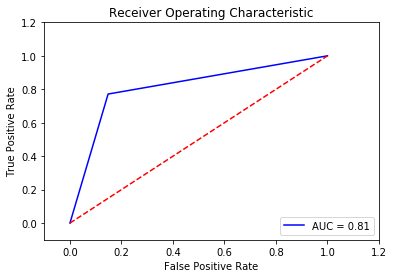

In [86]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
#Runing predictions
predictions = lrModel.predict(test_x)
predictions

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0])

In [88]:
#Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions)

0.8202247191011236